In [ ]:
from google.colab import files
files.upload()


Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"srastiagrawal","key":"f485780858ecace130d29a4c08bc619b"}'}

In [ ]:
!mv "kaggle (1).json" kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


!pip install -q kaggle


In [ ]:

!kaggle datasets download -d gratefuldata/intraday-stock-data-1-min-sp-500-200821


!unzip -q intraday-stock-data-1-min-sp-500-200821.zip


Dataset URL: https://www.kaggle.com/datasets/gratefuldata/intraday-stock-data-1-min-sp-500-200821
License(s): CC0-1.0
  0% 0.00/36.3M [00:00<?, ?B/s]
100% 36.3M/36.3M [00:00<00:00, 1.28GB/s]


In [ ]:
import pandas as pd
import numpy as np
data_path = "/content/1_min_SPY_2008-2021.csv"
df = pd.read_csv(data_path, parse_dates=['date'], index_col=0)
print("Data loaded. Number of rows:", len(df))
df.head()

Data loaded. Number of rows: 2070834


,date,open,high,low,close,volume,barCount,average
0,2009-05-22 07:30:00,89.45,89.46,89.37,89.37,7872,2102,89.424
1,2009-05-22 07:31:00,89.38,89.53,89.37,89.50,5336,1938,89.468
2,2009-05-22 07:32:00,89.51,89.54,89.48,89.49,3349,1184,89.516
3,2009-05-22 07:33:00,89.49,89.49,89.31,89.34,3495,1240,89.386
4,2009-05-22 07:34:00,89.33,89.46,89.33,89.39,9731,2637,89.379


In [ ]:
dup_count = df.duplicated().sum()
print(f"Duplicate rows before drop: {dup_count}")
if dup_count > 0:
    df = df[~df.duplicated()]
    print("Duplicates dropped.")


print("Null values per column:\n", df.isnull().sum())


numeric_cols = ['open','high','low','close','volume','barCount','average']
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

df.dropna(inplace=True)
print("Data types after conversion:\n", df.dtypes)

Duplicate rows before drop: 638054
Duplicates dropped.
Null values per column:
 date        0
open        0
high        0
low         0
close       0
volume      0
barCount    0
average     0
dtype: int64
Data types after conversion:
 date        datetime64[ns]
open               float64
high               float64
low                float64
close              float64
volume               int64
barCount             int64
average            float64
dtype: object


<ipython-input-6-327952694>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')


In [ ]:
symbol_col = None
if 'symbol' in df.columns:
    symbol_col = 'symbol'
elif 'ticker' in df.columns:
    symbol_col = 'ticker'

if symbol_col:
    top_symbol = df.groupby(symbol_col)['volume'].sum().idxmax()
    df = df[df[symbol_col] == top_symbol]
    print(f"Selected ticker: {top_symbol}")
else:
    top_symbol = "SPY"
    print("No symbol column found; assuming single-ticker data (SPY).")


print("Date range:", df.index.min(), "to", df.index.max())

No symbol column found; assuming single-ticker data (SPY).
Date range: 0 to 2070833


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1432780 entries, 0 to 2070833
Data columns (total 8 columns):
 #   Column    Non-Null Count    Dtype         
---  ------    --------------    -----         
 0   date      1432780 non-null  datetime64[ns]
 1   open      1432780 non-null  float64       
 2   high      1432780 non-null  float64       
 3   low       1432780 non-null  float64       
 4   close     1432780 non-null  float64       
 5   volume    1432780 non-null  int64         
 6   barCount  1432780 non-null  int64         
 7   average   1432780 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 98.4 MB
None


In [ ]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
date,1432780,2015-03-14 14:16:36.620989440,2008-01-22 07:30:00,2011-08-23 09:54:45,2015-04-27 10:57:30,2018-12-21 08:52:15,2021-05-06 13:59:00,NaN
open,1432780.0,209.091949,67.12,133.03,202.84,277.73,420.67,84.074388
high,1432780.0,209.142608,67.2,133.06,202.89,277.8,420.72,84.081762
low,1432780.0,209.040839,67.1,132.99,202.79,277.66,420.4,84.066553
close,1432780.0,209.091939,67.12,133.03,202.84,277.73,420.67,84.074337
volume,1432780.0,2696.174443,0.0,658.0,1501.0,3263.0,331282.0,3793.733473
barCount,1432780.0,836.960584,0.0,277.0,549.0,1054.0,30245.0,967.467421
average,1432780.0,209.091774,67.152,133.028,202.8415,277.72525,420.535,84.074189


In [ ]:
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_theme(style="darkgrid")

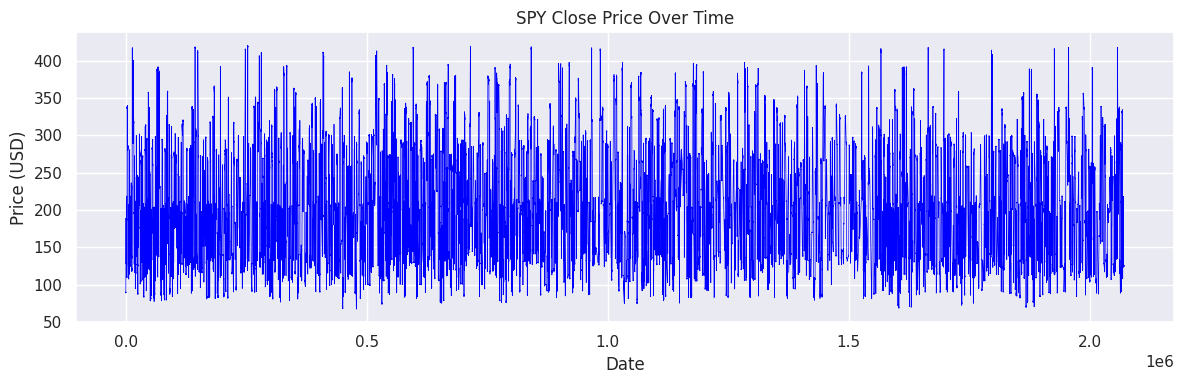

In [ ]:
# Plot closing price over time
plt.figure(figsize=(12,4))
plt.plot(df.index, df['close'], color='blue', linewidth=0.5)
plt.title('SPY Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.tight_layout()
plt.show()

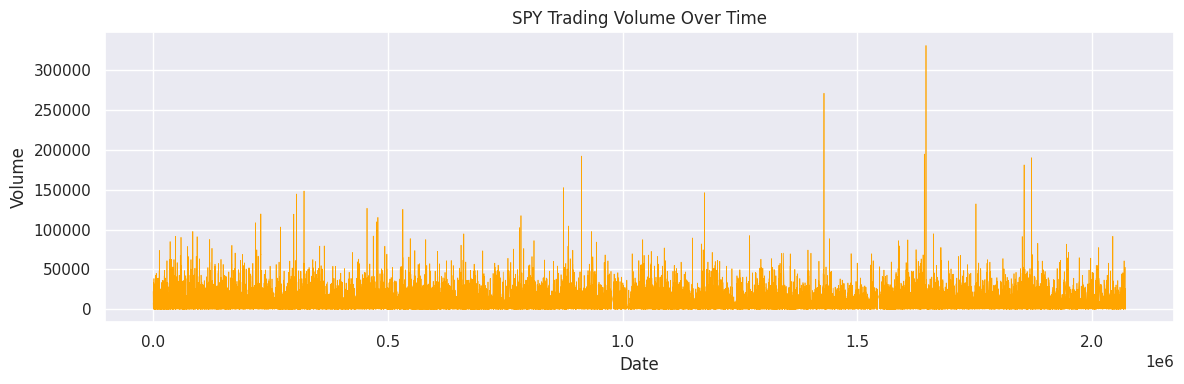

In [ ]:
# Plot trading volume over time
plt.figure(figsize=(12,4))
plt.plot(df.index, df['volume'], color='orange', linewidth=0.5)
plt.title('SPY Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.tight_layout()
plt.show()

In [ ]:
# Compute returns
df['return'] = df['close'].pct_change() * 100  # percentage returns
returns = df['return'].dropna()

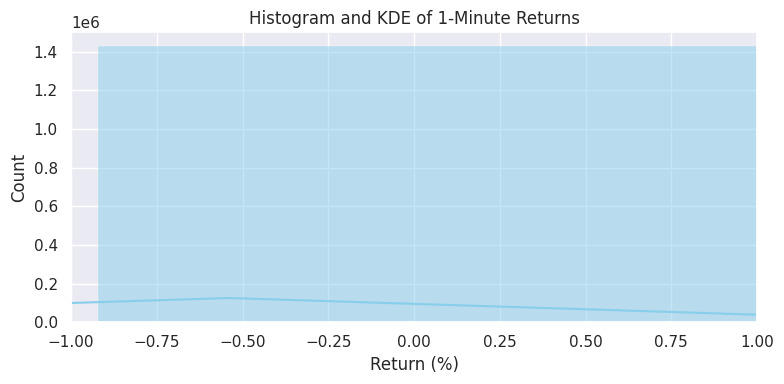

In [ ]:
# Histogram + KDE of returns
plt.figure(figsize=(8,4))
sns.histplot(returns, bins=200, kde=True, color='skyblue')
plt.title('Histogram and KDE of 1-Minute Returns')
plt.xlabel('Return (%)')
plt.xlim(-1, 1)
plt.tight_layout()
plt.show()


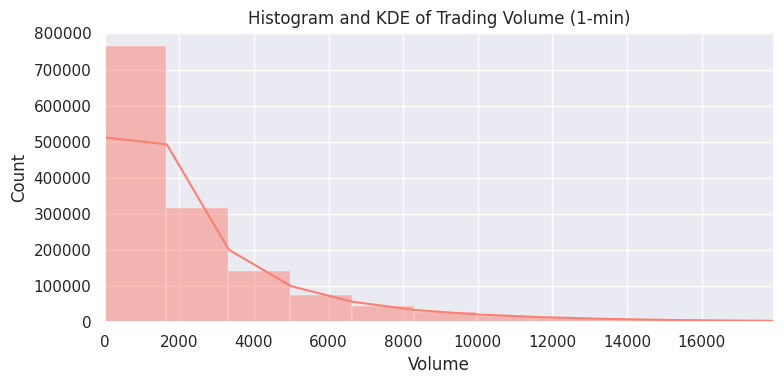

In [ ]:
# Histogram + KDE of volume (log scale)
plt.figure(figsize=(8,4))
sns.histplot(df['volume'], bins=200, kde=True, color='salmon')
plt.xlim(0, df['volume'].quantile(0.99))  # truncate for visibility
plt.title('Histogram and KDE of Trading Volume (1-min)')
plt.xlabel('Volume')
plt.tight_layout()
plt.show()

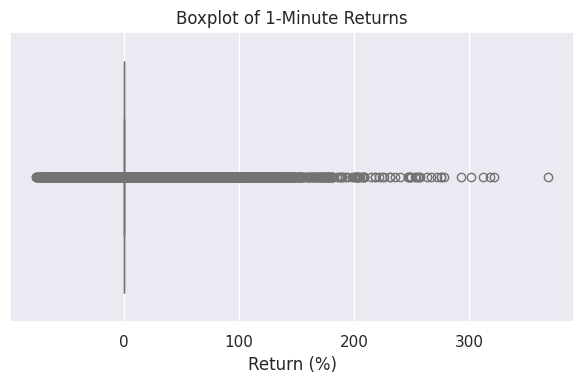

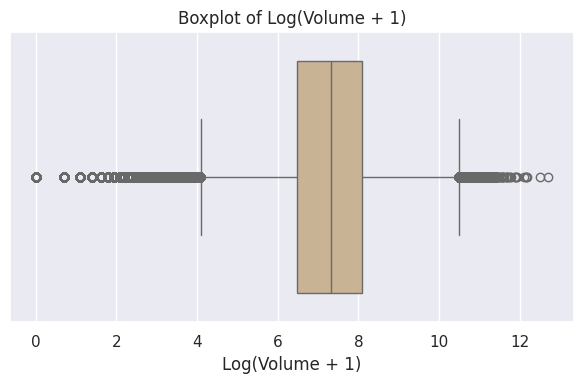

In [ ]:
# Boxplot of returns
plt.figure(figsize=(6,4))
sns.boxplot(x=returns, color='lightgreen')
plt.title('Boxplot of 1-Minute Returns')
plt.xlabel('Return (%)')
plt.tight_layout()
plt.show()

# Boxplot of volume
plt.figure(figsize=(6,4))
sns.boxplot(x=np.log1p(df['volume']), color='tan')  # log(1+volume) for scale
plt.title('Boxplot of Log(Volume + 1)')
plt.xlabel('Log(Volume + 1)')
plt.tight_layout()
plt.show()

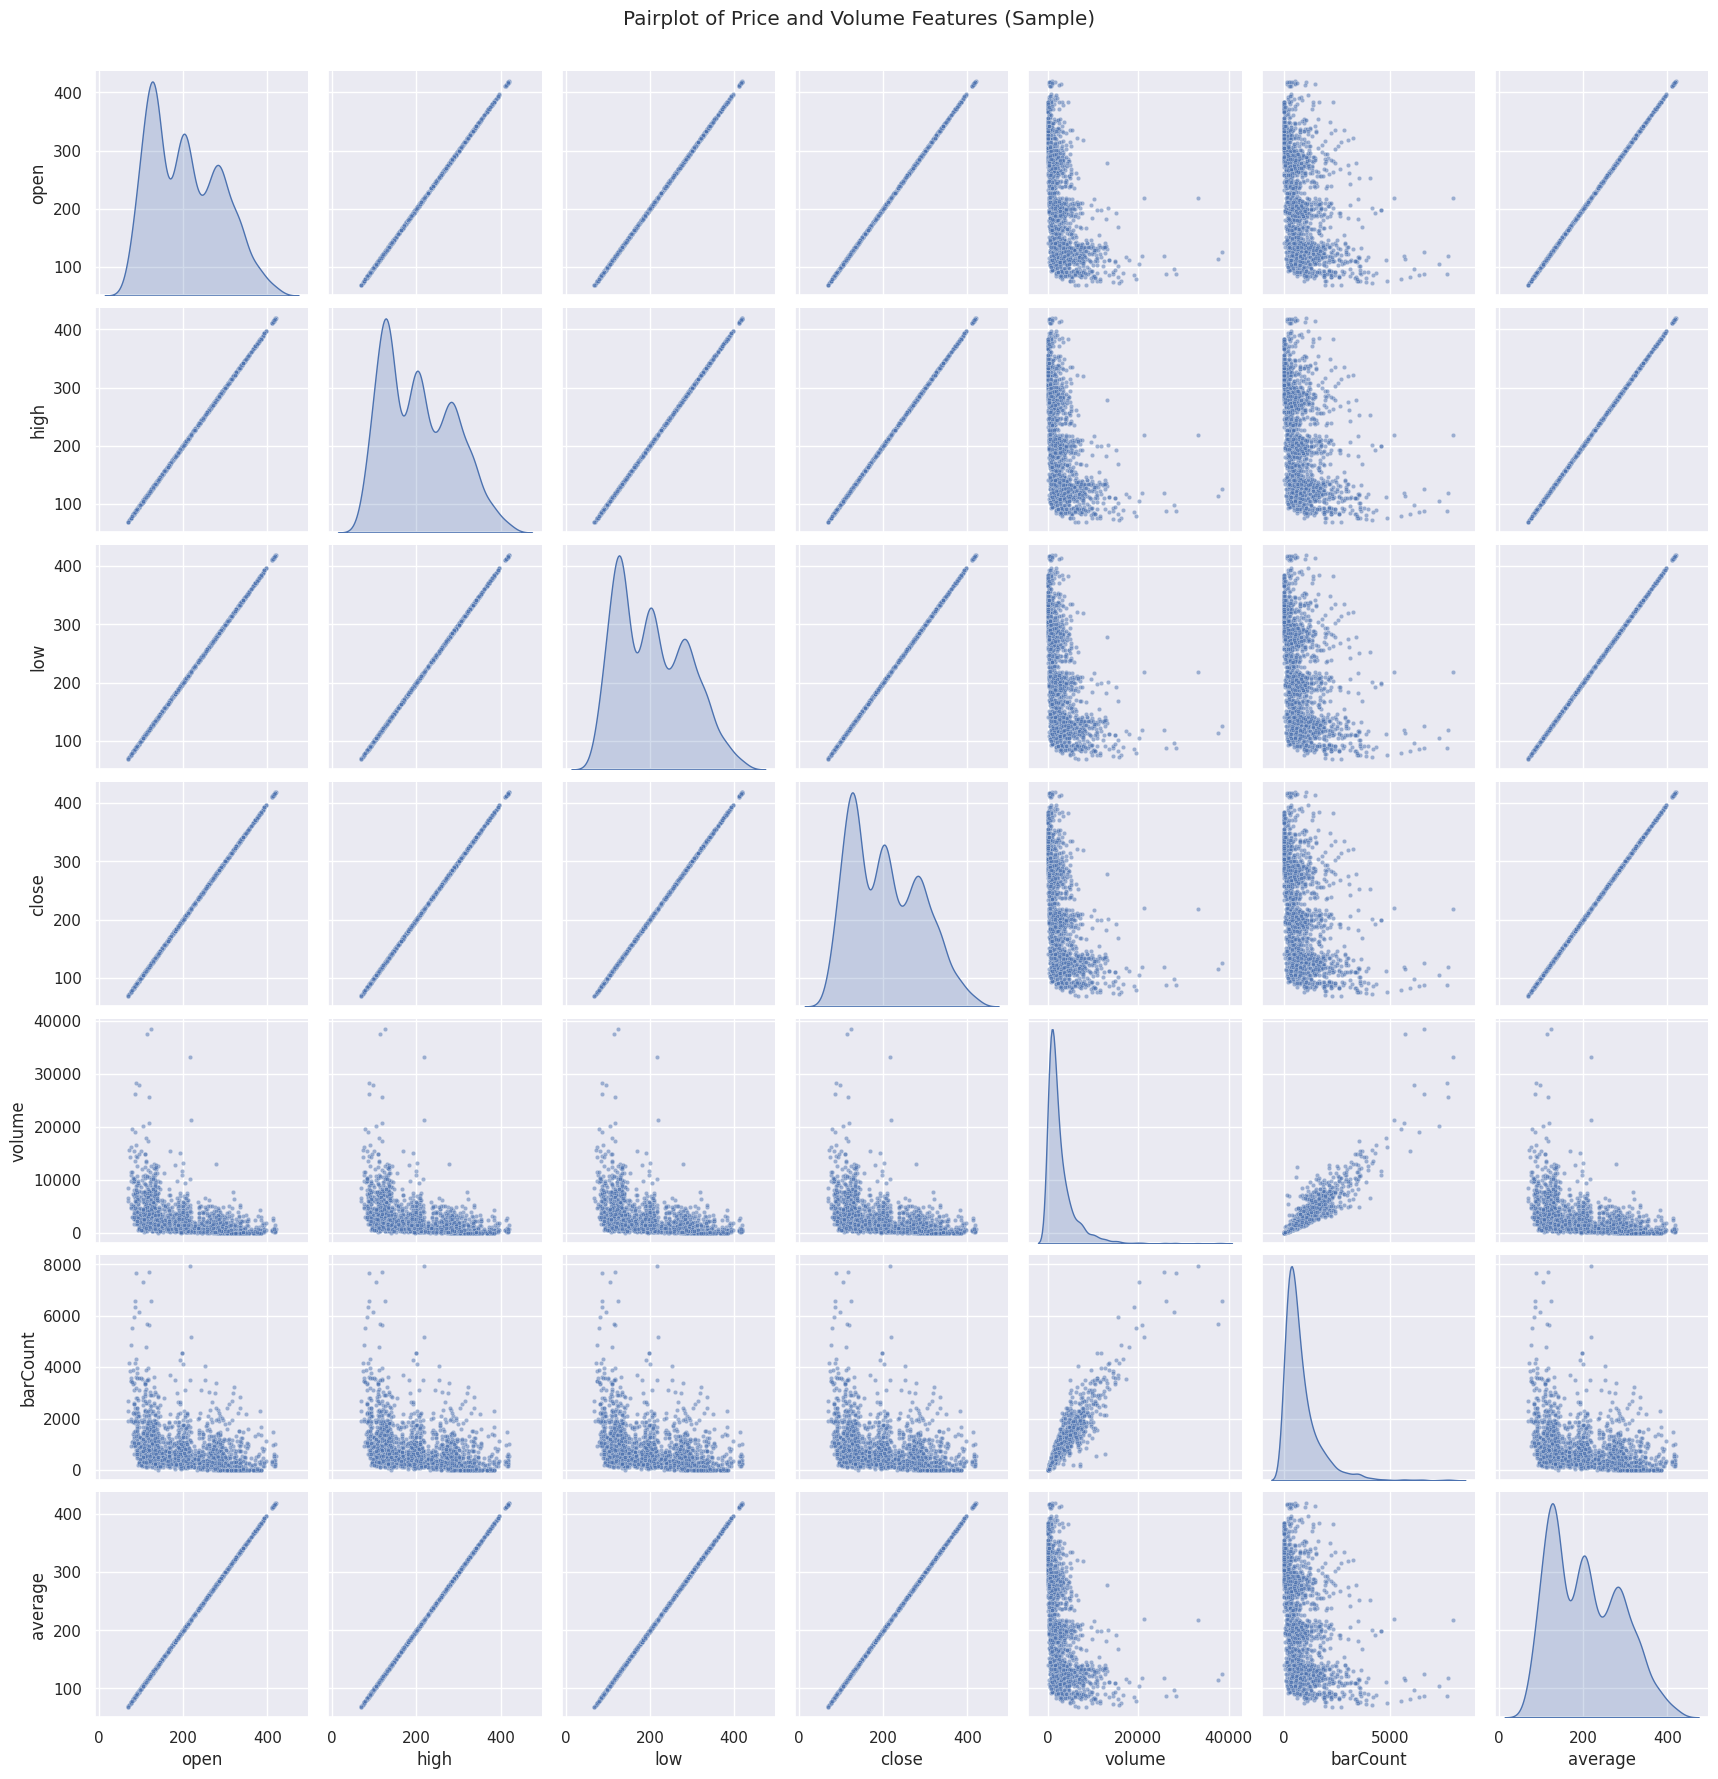

In [ ]:
# Sample data for pairplot (for speed and clarity)
sample_df = df[['open','high','low','close','volume','barCount','average']].dropna().sample(2000, random_state=0)
sns.pairplot(sample_df, diag_kind='kde', plot_kws={'alpha':0.5, 's':10})
plt.suptitle('Pairplot of Price and Volume Features (Sample)', y=1.02)
plt.show()

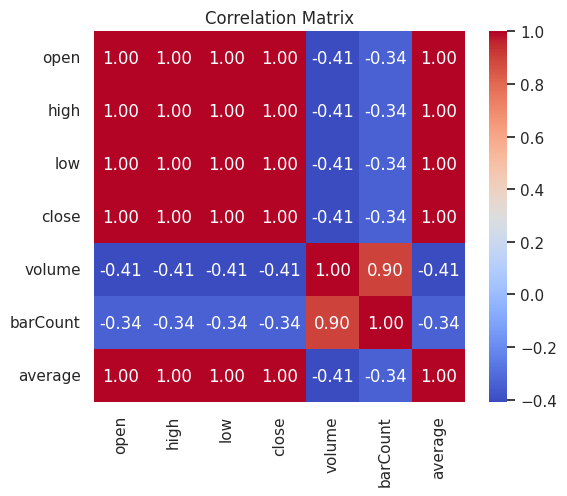

In [ ]:
# Correlation matrix heatmap
corr = df[['open','high','low','close','volume','barCount','average']].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [ ]:
# Ensure datetime index is correct
df.index = pd.to_datetime(df.index)

# Extract hour from timestamp
df['hour'] = df.index.hour

In [ ]:
# Grouping
hourly_vol = df.groupby('hour')['volume'].mean()
hourly_close = df.groupby('hour')['close'].mean()

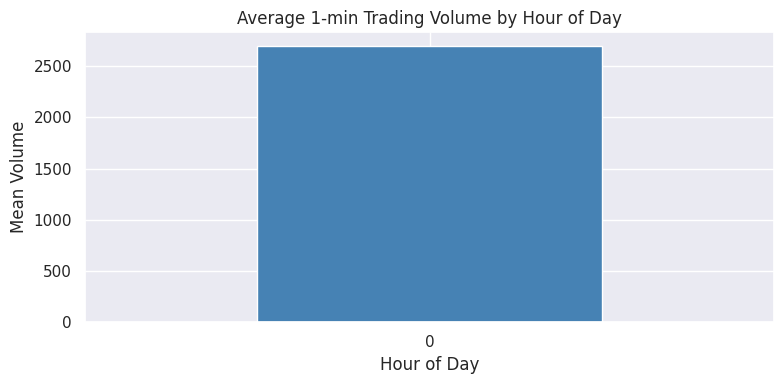

In [ ]:
# Bar plot: average volume
plt.figure(figsize=(8,4))
hourly_vol.plot(kind='bar', color='steelblue')
plt.title('Average 1-min Trading Volume by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Mean Volume')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

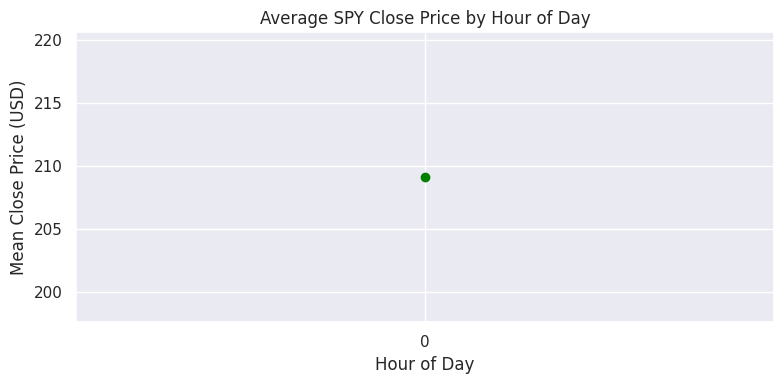

In [ ]:
# Line plot: average closing price
plt.figure(figsize=(8,4))
plt.plot(hourly_close.index, hourly_close.values, marker='o', color='green')
plt.title('Average SPY Close Price by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Mean Close Price (USD)')
plt.xticks(range(hourly_close.index.min(), hourly_close.index.max()+1))
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1400x600 with 0 Axes>

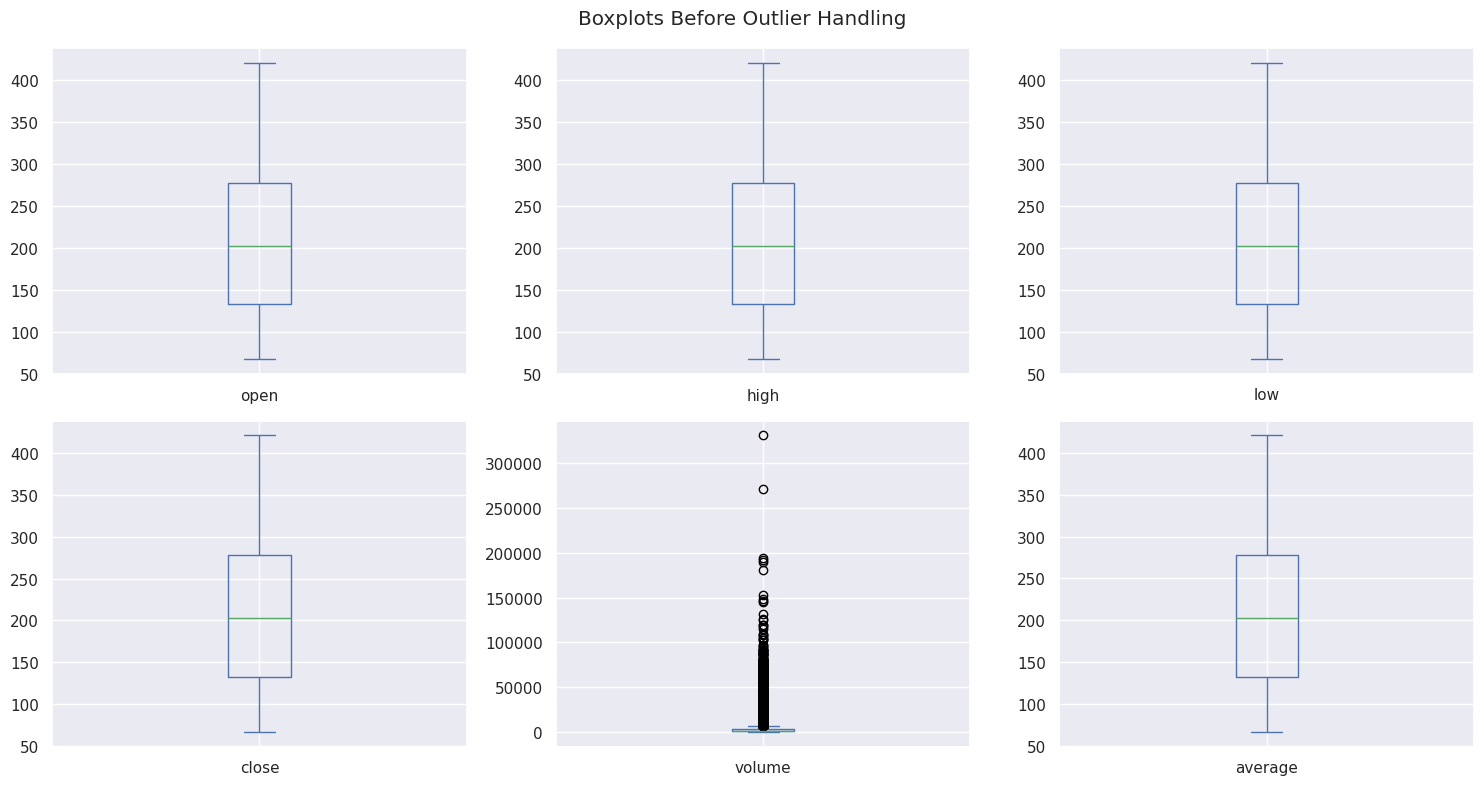

In [ ]:
# boxplot to visualize outliers
import seaborn as sns
import matplotlib.pyplot as plt


columns = ['open', 'high', 'low', 'close', 'volume', 'average']

plt.figure(figsize=(14, 6))
df[columns].plot(kind='box', subplots=True, layout=(2, 3), figsize=(15, 8), sharex=False, sharey=False)
plt.suptitle("Boxplots Before Outlier Handling")
plt.tight_layout()
plt.show()


In [ ]:
def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR


    df[column] = df[column].clip(lower=lower, upper=upper)

    return df

for col in ['open', 'high', 'low', 'close', 'volume', 'average']:
    df = handle_outliers_iqr(df, col)


<Figure size 1400x600 with 0 Axes>

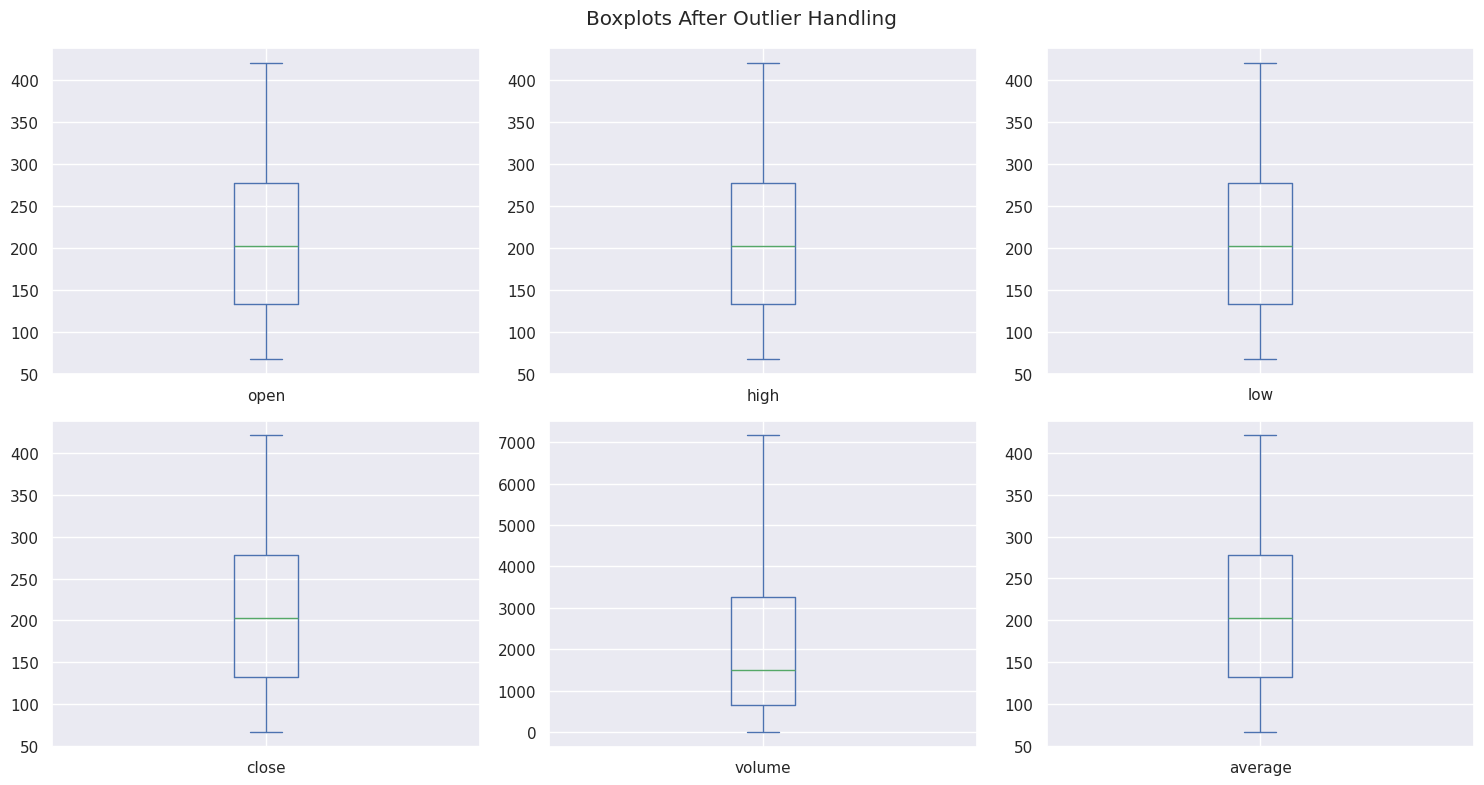

In [ ]:
# boxplot after outlier handling
plt.figure(figsize=(14, 6))
df[columns].plot(kind='box', subplots=True, layout=(2, 3), figsize=(15, 8), sharex=False, sharey=False)
plt.suptitle("Boxplots After Outlier Handling")
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

data = df[['close']].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [ ]:
# Create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i - seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

sequence_length = 60
X, y = create_sequences(scaled_data, sequence_length)

# Reshape for LSTM input
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split into training and testing sets
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import tensorflow as tf

# Check GPU
print("GPU Available:", tf.config.list_physical_devices('GPU'))

# Build the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=25, validation_data=(X_test, y_test))


Epoch 1/25
35818/35818 ━━━━━━━━━━━━━━━━━━━━ 332s 9ms/step - loss: 0.0011 - val_loss: 2.5775e-04
Epoch 2/25
35818/35818 ━━━━━━━━━━━━━━━━━━━━ 337s 9ms/step - loss: 5.7715e-04 - val_loss: 2.4598e-04
Epoch 3/25
35818/35818 ━━━━━━━━━━━━━━━━━━━━ 387s 10ms/step - loss: 5.4731e-04 - val_loss: 2.9547e-04
Epoch 4/25
35818/35818 ━━━━━━━━━━━━━━━━━━━━ 377s 9ms/step - loss: 5.3833e-04 - val_loss: 2.1725e-04
Epoch 5/25
35818/35818 ━━━━━━━━━━━━━━━━━━━━ 381s 9ms/step - loss: 5.3190e-04 - val_loss: 3.0455e-04
Epoch 6/25
35818/35818 ━━━━━━━━━━━━━━━━━━━━ 385s 9ms/step - loss: 5.2546e-04 - val_loss: 2.1972e-04
Epoch 7/25
35818/35818 ━━━━━━━━━━━━━━━━━━━━ 380s 9ms/step - loss: 5.2312e-04 - val_loss: 2.1981e-04
Epoch 8/25
35818/35818 ━━━━━━━━━━━━━━━━━━━━ 388s 10ms/step - loss: 5.2813e-04 - val_loss: 2.1508e-04
Epoch 9/25
35818/35818 ━━━━━━━━━━━━━━━━━━━━ 340s 9ms/step - loss: 5.1108e-04 - val_loss: 2.1206e-04
Epoch 10/25
35818/35818 ━━━━━━━━━━━━━━━━━━━━ 337s 9ms/step - loss: 5.2094e-04 - val_loss: 2.1278e-04
E

8955/8955 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step


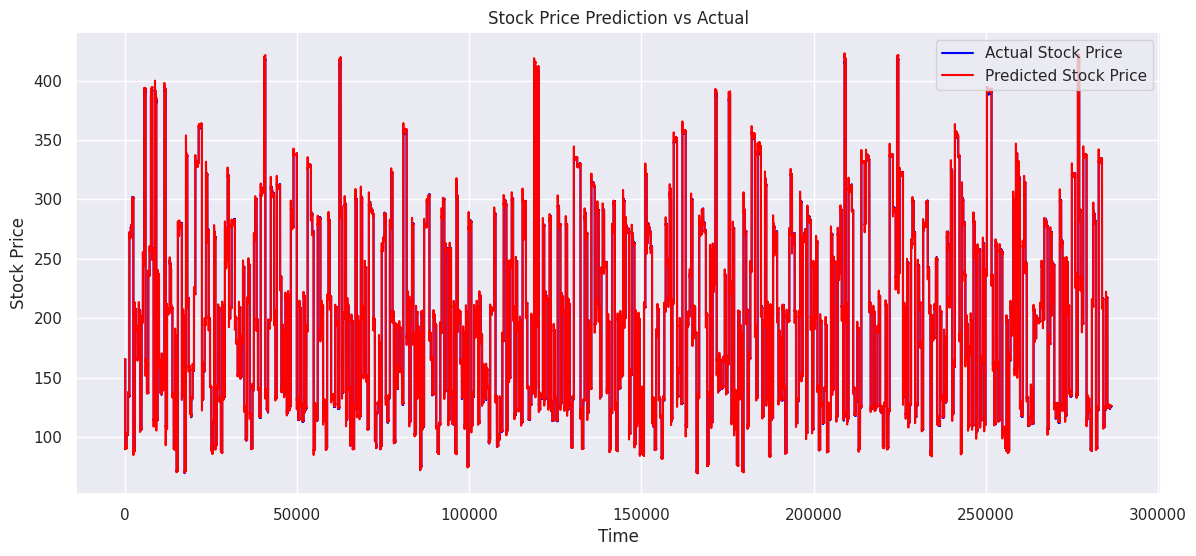

In [ ]:
# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))

# Inverse transform the actual values
actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot predictions vs actual
plt.figure(figsize=(14,6))
plt.plot(actual, color='blue', label='Actual Stock Price')
plt.plot(predictions, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction vs Actual')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(actual, predictions)
mae = mean_absolute_error(actual, predictions)
r2 = r2_score(actual, predictions)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {r2}")


Mean Squared Error: 26.50940190591007
Mean Absolute Error: 0.7147491917159451
R2 Score: 0.9959959570317756


In [ ]:
from keras.models import load_model

model.save("lstm_stock_model.keras")



In [ ]:
#Predict Future Prices (Forecasting)
last_sequence = scaled_data[-sequence_length:]  # last 60 points
last_sequence = np.expand_dims(last_sequence, axis=0)
next_price_scaled = model.predict(last_sequence)
next_price = scaler.inverse_transform([[next_price_scaled[0][0]] + [0]*7])[0][0]
print(f"Next predicted price: {next_price}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
Next predicted price: 126.35319763019682
